<a href="https://colab.research.google.com/github/asheta66/CNN-WorkOut/blob/main/Classification_Using_ML_Alaa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Classification Using Machine Learning (Alaa1)
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [293]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#=============================================
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#=============================================

## Read Data

In [235]:
# We are reading our data
url = "https://raw.githubusercontent.com/asheta66/CNN-WorkOut/main/copd2.csv"
df  =  pd.read_csv(url)

In [236]:
# First 5 rows of our data
print(df.shape)
print(list(df.columns))
df.head()

(1857, 11)
['height', 'weight', 'age', 'sex', 'race', 'fv1/fvc', 'fev1/fev6', 'smoker', 'cough', 'dapnea', 'target']


,height,weight,age,sex,race,fv1/fvc,fev1/fev6,smoker,cough,dapnea,target
0,66.50,165.0,66,0,0,48,102,1,1,1,1
1,68.75,204.0,66,0,0,52,79,1,0,0,1
2,68.00,197.0,59,0,1,80,69,0,1,1,1
3,62.00,141.0,79,1,0,69,99,1,0,1,1
4,61.50,159.0,80,1,0,70,102,1,1,0,1


Data contains; <br>

*   height	<br>
*   weight	<br>
*   age - age in years	<br> 
*   sex - (1 = male; 2 = female)<br> 	
*   ace<br>	
*   fev1/fec<br>	
*   fev1/fev6 <br>	
*   smoker<br>	
*   cough	<br>
*   daonea<br>
*  target - have disease or not (Y=yes, N=no)

## Data Exploration

In [237]:
df.target.value_counts()

0    1151
1     706
Name: target, dtype: int64

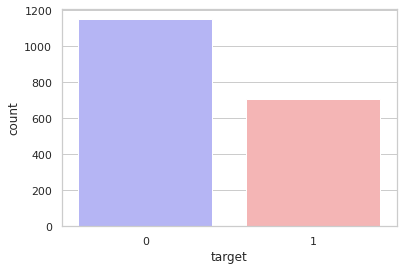

In [306]:
sns.countplot(x="target", data=df, palette="bwr")
plt.savefig('class_dist.png')
plt.show()


In [309]:
counts = numpy.unique(a, return_counts=True)


ModuleNotFoundError: ignored

In [239]:
countNoDisease = len(df[df.target == 1])
countHaveDisease = len(df[df.target == 0])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 38.02%
Percentage of Patients Have Heart Disease: 61.98%


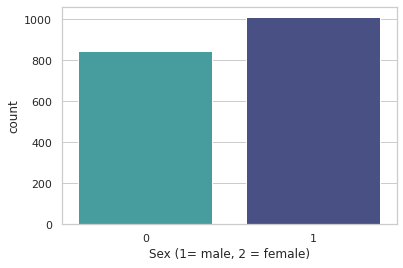

In [240]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (1= male, 2 = female)")

plt.savefig('sex_dist.png')
plt.show()

In [241]:
countFemale = len(df[df.sex == 1])
countMale = len(df[df.sex == 0])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 54.39%
Percentage of Male Patients: 45.61%


In [242]:
df.groupby('target').mean()

,height,weight,age,sex,race,fv1/fvc,fev1/fev6,smoker,cough,dapnea
target,,,,,,,,,,
0,64.283927,194.215769,65.253692,0.569939,0.508254,78.490009,98.360556,0.494353,0.572546,0.743701
1,64.278329,184.364023,70.779037,0.501416,0.337110,65.060907,85.046742,0.824363,0.614731,0.841360


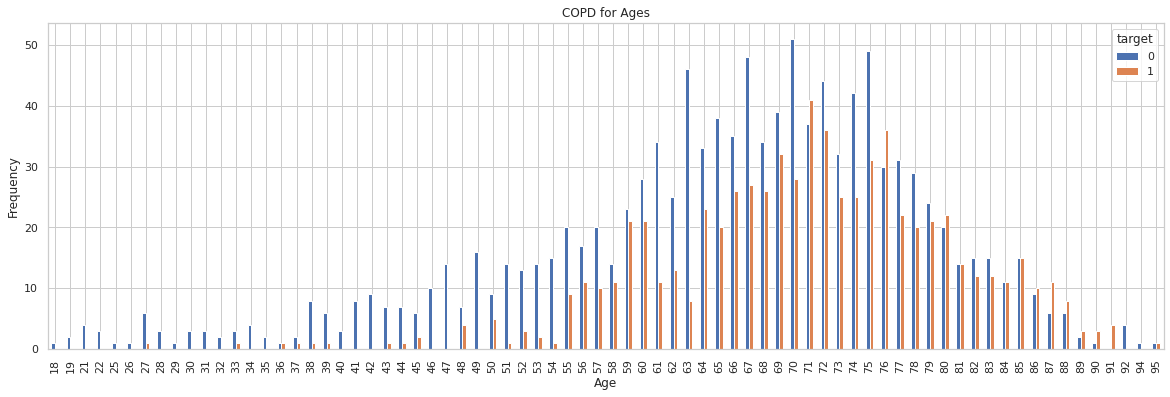

In [243]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('COPD for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('COPDforAges.png')
plt.show()

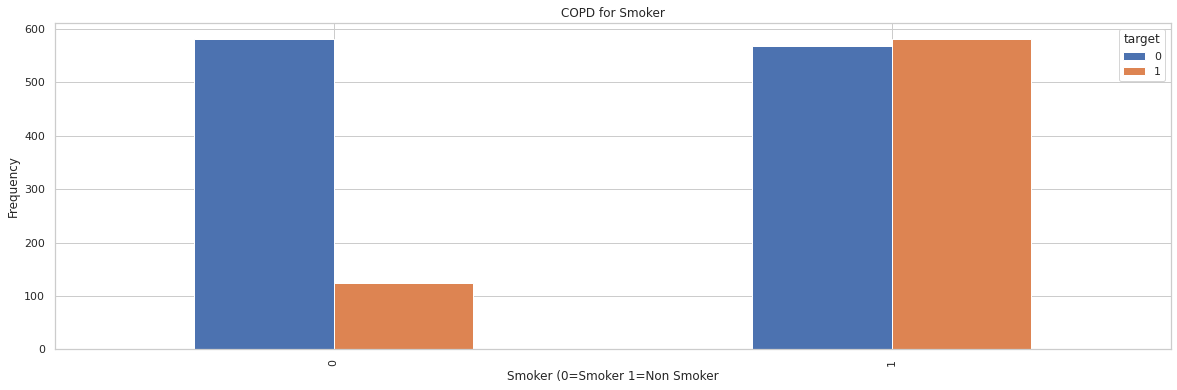

In [244]:
pd.crosstab(df.smoker,df.target).plot(kind="bar",figsize=(20,6))
plt.title('COPD for Smoker')
plt.xlabel('Smoker (0=Smoker 1=Non Smoker')
plt.ylabel('Frequency')
plt.savefig('COPDforSmoker.png')
plt.show()

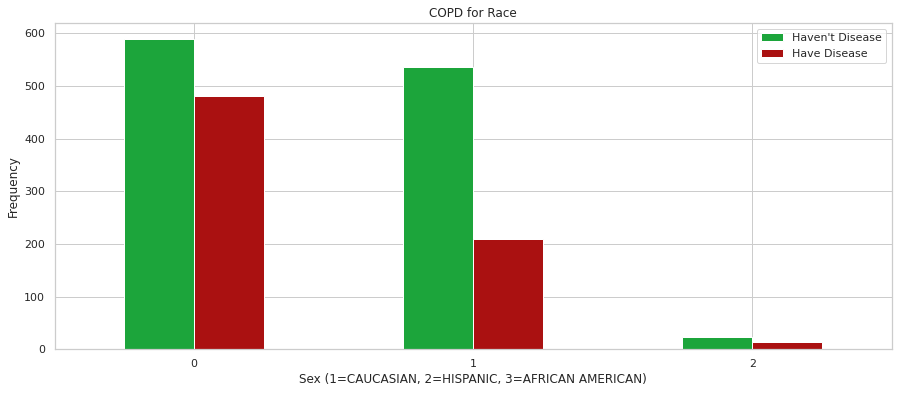

<Figure size 432x288 with 0 Axes>

In [245]:
pd.crosstab(df.race,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('COPD for Race')
plt.xlabel('Sex (1=CAUCASIAN, 2=HISPANIC, 3=AFRICAN AMERICAN)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
plt.savefig('race_dist.png')


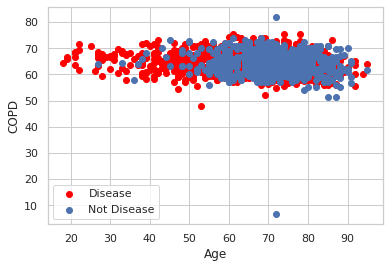

In [246]:
plt.scatter(x=df.age[df.target==0], y=df.height[(df.target==0)], c="red")
plt.scatter(x=df.age[df.target==1], y=df.height[(df.target==1)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("COPD")
plt.savefig('COPD_Age_scatter.png')
plt.show()



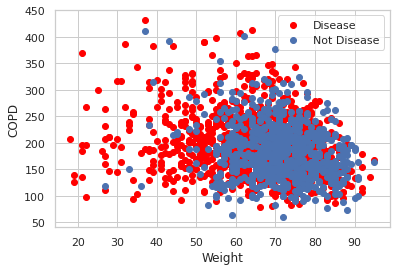

In [247]:
plt.scatter(x=df.age[df.target==0], y=df.weight[(df.target==0)], c="red")
plt.scatter(x=df.age[df.target==1], y=df.weight[(df.target==1)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Weight")
plt.ylabel("COPD")
plt.savefig('COPD_Weight_scatter.png')
plt.show()

### Creating Dummy Variables

![](http://)Since 'smoker',	'cough' and 'dYspNea' are categorical variables we'll turn them into dummy variables.

In [248]:
#b = pd.get_dummies(df['cough'], prefix = "cough")
#c = pd.get_dummies(df['smoker'], prefix = "dYspNea")

In [249]:
#frames = [df, b, c]
#df = pd.concat(frames, axis = 1)
#df.head()

In [250]:
#df = df.drop(columns = ['cough', 'dYspNea'])
#df.head()

## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [251]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [252]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [254]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [255]:
x_train.head()

,1084,553,1409,1311,1135,1533,768,1197,961,501,1205,810,1097,302,539,904,171,1414,1614,452,270,227,1187,1639,1509,1686,616,1586,1344,979,1367,557,1670,996,1148,378,579,1368,379,192,...,1201,99,850,448,1455,1733,755,976,115,777,72,845,537,1701,849,1624,174,87,551,1510,705,314,1420,600,1496,1094,599,1828,1778,277,1747,1033,1383,1731,763,835,1216,1653,559,684
height,0.754967,0.725166,0.754967,0.788079,0.781457,0.672185,0.701987,0.804636,0.778146,0.801325,0.771523,0.685430,0.731788,0.850993,0.778146,0.827815,0.721854,0.735099,0.708609,0.741722,0.768212,0.708609,0.718543,0.754967,0.784768,0.764901,0.748344,0.711921,0.850993,0.754967,0.814570,0.754967,0.827815,0.761589,0.721854,0.751656,0.695364,0.894040,0.748344,0.807947,...,0.814570,0.721854,0.705298,0.831126,0.738411,0.774834,0.745033,0.831126,0.844371,0.788079,0.894040,0.649007,0.725166,0.735099,0.708609,0.801325,0.731788,0.834437,0.860927,0.741722,0.761589,0.715232,0.768212,0.629139,0.850993,0.784768,0.741722,0.824503,0.761589,0.738411,0.817881,0.807947,0.708609,0.804636,0.768212,0.811258,0.682119,0.725166,0.764901,0.735099
weight,0.220362,0.460147,0.110516,0.378433,0.370395,0.059612,0.745479,0.407904,0.287341,0.272605,0.410583,0.122572,0.563295,0.268587,0.397187,0.523108,0.415941,0.327528,0.204287,0.105157,0.351641,0.458808,0.351641,1.000000,0.732083,0.507033,0.083724,0.355660,0.415941,0.209645,0.758875,0.265908,0.188212,0.142666,0.694575,0.148024,0.186872,0.490958,0.541862,0.389149,...,0.343603,0.292699,0.219022,0.608841,0.335566,0.244474,0.732083,0.531145,0.890154,0.769591,0.332887,0.131949,0.097120,0.215003,0.164099,0.314133,0.265908,0.340924,0.555258,0.474883,0.427997,0.233758,0.260549,0.239116,0.450770,0.193570,0.223041,0.657066,0.359678,0.401206,0.565975,0.536504,0.279303,0.480241,0.379504,0.375754,0.287341,0.327528,0.306095,0.247153
age,0.753247,0.714286,0.675325,0.467532,0.649351,0.662338,0.493506,0.636364,0.662338,0.597403,0.727273,0.753247,0.623377,0.584416,0.753247,0.506494,0.649351,0.493506,0.987013,0.480519,0.753247,0.636364,0.636364,0.246753,0.571429,0.532468,0.740260,0.779221,0.584416,0.493506,0.220779,0.610390,0.571429,0.532468,0.636364,0.688312,0.792208,0.649351,0.636364,0.805195,...,0.779221,0.597403,0.779221,0.779221,0.623377,0.558442,0.402597,0.597403,0.324675,0.649351,0.649351,0.441558,0.779221,0.402597,0.727273,0.441558,0.688312,0.506494,0.649351,0.454545,0.688312,0.701299,0.506494,0.792208,0.558442,0.883117,0.493506,0.376623,0.441558,0.688312,0.623377,0.558442,0.818182,0.493506,0.649351,0.779221,0.636364,0.441558,0.545455,0.753247
sex,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
race,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,0.5

Let's say weight = 0.01 and bias = 0.0

In [256]:
#initialize
def initialize(dimension):    
    weight = np.full((dimension,1),0.001)
    bias = 0.0
    return weight,bias

### Sigmoid Function
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

In [257]:
def sigmoid(z):
  
    y_head = 1/(1+ np.exp(-z))
    return y_head

### Forward and Backward Propagation
<br>
<img src="https://image.slidesharecdn.com/gradientdescentbackpropandautomaticdifferentiation-160829164205/95/gradient-descent-back-propagation-and-auto-differentiation-advanced-spark-and-tensorflow-meetup-08042016-62-638.jpg?cb=1472489358" width="500px"/>

### Cost Function
<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

### Gradient Descent
<br>
<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>

By the way in formulas; <br>
* h0(x^i)= y_head
* y^i = y_train
* x^i = x_train

In [258]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [259]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [260]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction


## <font color="blue">Run logistic regression based function code <font color="red"></font>




In [261]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension   = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction1 = predict(parameters["weight"],parameters["bias"],x_train)
    print("LR Accuracy in Training Case: {:.2f}%".format((100 - np.mean(np.abs(y_prediction1 - y_train))*100)))

    y_prediction2 = predict(parameters["weight"],parameters["bias"],x_test)
    print("LR Accuracy in Testing Case: {:.2f}%".format((100 - np.mean(np.abs(y_prediction2 - y_test))*100)))
    
# print(y_prediction1)
# print("")
# print(y_train)

# np.mean(np.abs(y_prediction1 - y_train))

iteration: 100
cost: 0.5572562017852973


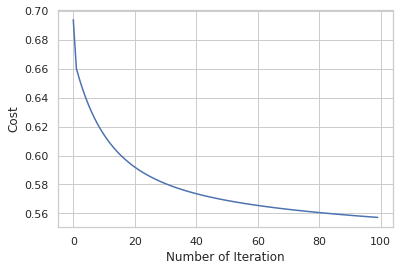

LR Accuracy in Training Case: 73.40%
LR Accuracy in Testing Case: 70.43%


<Figure size 432x288 with 0 Axes>

In [262]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)
plt.savefig('LR_Convergance.png')

You can also get the value of the slope 𝑏1,...,*b10*  and the intercept 𝑏₀ of the linear function 𝑓 like so

In [263]:
print(model.intercept_)
print("")
print("['height', 'weight', 'age', 'sex', 'race', 'fv1/fvc', 'fev1/fev6', 'smoker', 'cough', 'dapnea', 'target']")
print(model.coef_)

[0.63909053]

['height', 'weight', 'age', 'sex', 'race', 'fv1/fvc', 'fev1/fev6', 'smoker', 'cough', 'dapnea', 'target']
[[-1.70823919  0.58615462  1.99680461  0.09478398 -0.24628104 -3.59550804
  -2.60427668  0.96829172 -0.03934809  0.33351216]]


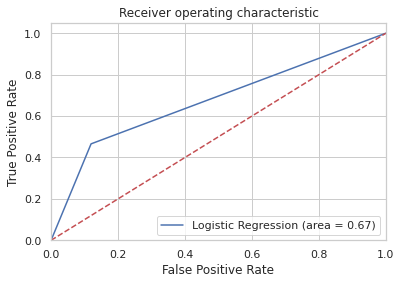

In [264]:
logit_roc_auc          = roc_auc_score(y_test, y_prediction2)
fpr, tpr, thresholds = roc_curve(y_test, y_prediction2)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


## <font color="blue">A new code for logistic regression based sklearn <font color="red"></font>




In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np

# Create a model and train it
model = LogisticRegression()

# Fit a model 
model.fit(x_train.T, y_train.T)

# Calculate accuracy
acc1 = lr.score(x_train.T,y_train.T)*100
acc2 = lr.score(x_test.T,y_test.T)*100

accuracies1['Logistic Regression'] = acc1
accuracies2['Logistic Regression'] = acc2

print("LR Accuracy in Training Case {:.2f}%".format(acc1))
print("LR Accuracy in Testing Case {:.2f}%".format(acc2))


LR Accuracy in Training Case 74.61%
LR Accuracy in Testing Case 71.77%


## <font color="blue">Manuel Test Accuracy is <font color="red">**70.43%**</font></font><br>
Let's find out sklearn's score.

### Sklearn Logistic Regression

<h2>Solver Options:</h2>
<ul>
<li> newton-cg — A newton method. Newton methods use an exact Hessian matrix. It's slow for large datasets, because it computes the second derivatives. </li>

<li> lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets. It will be the default solver as of Scikit-learn version 0.22.0.</li>
<li> liblinear — Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. In other words, it moves toward the minimum in one direction at a time. It is the default solver for Scikit-learn versions earlier than 0.22.0. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.</li>
<li> sag — Stochastic Average Gradient descent. A variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Fast for big datasets.
saga — Extension of sag that also allows for L1 regularization. Should generally train faster than sag.</li>

The solvers implemented in the class Logistic Regression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”


In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np

accuracies1 = {}
accuracies2 = {}


# Create a model and train it
# lr = LogisticRegression()
# lr = LogisticRegression(solver='liblinear', random_state=0)
# lr = LogisticRegression(solver='newton-cg', random_state=0)
lr = LogisticRegression(solver='sag', random_state=0)

# Fit a model 
lr.fit(x_train.T,y_train.T)

# Calculate accuracy
acc1 = lr.score(x_train.T,y_train.T)*100
acc2 = lr.score(x_test.T,y_test.T)*100

accuracies1['Logistic Regression'] = acc1
accuracies2['Logistic Regression'] = acc2

print("LR Accuracy in Training Case {:.2f}%".format(acc1))
print("LR Accuracy in Testing Case {:.2f}%".format(acc2))

LR Accuracy in Training Case 74.61%
LR Accuracy in Testing Case 71.77%


## <font color = "purple"> <br>
Newton<br>
LR Accuracy in Training Case 76.16%<br>
LR Accuracy in Testing Case 72.58%<br>
<br>
Bilinear<br>
LR Accuracy in Training Case 75.96% <br>
LR Accuracy in Testing Case 72.31%<br>
<br>
Lbfgs – default solver<br>
LR Accuracy in Training Case 74.55%<br>
LR Accuracy in Testing Case 71.77%<br>
</font>

[0.         0.11946903 1.        ]
[0.         0.46575342 1.        ]


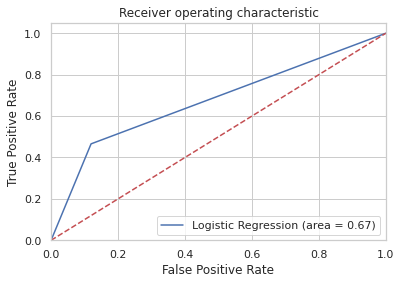

In [267]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc          = roc_auc_score(y_test, y_prediction2)
fpr, tpr, thresholds = roc_curve(y_test, y_prediction2)

# True Positive and False Positive
print(fpr)
print(tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## K-Nearest Neighbour (KNN) Classification
<br>
Let's see what will be score if we use KNN algorithm.

**KNN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [268]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)

prediction1 = knn.predict(x_train.T)
prediction2 = knn.predict(x_test.T)

print("{}KNN Accuracy in Training Case: {:.2f}%".format(2, knn.score(x_train.T, y_train.T)*100))
print("{}KNN Accuracy in Testing Case: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2KNN Accuracy in Training Case: 81.48%
2KNN Accuracy in Testing Case: 65.59%



1. ## <font color = "purple">Our model works with <font color="red">**65.59%**</font> accuracy.</font>


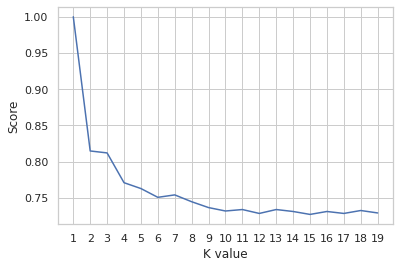

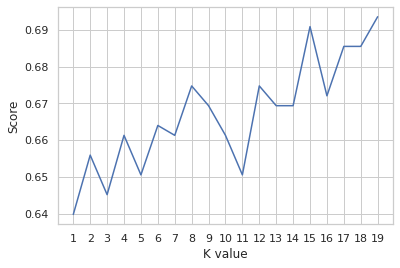

Maximum KNN Score is 100.00%
Maximum KNN Score is 69.35%


In [269]:
# try ro find best k value
scoreList1 = []
scoreList2 = []

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList1.append(knn2.score(x_train.T, y_train.T))
    scoreList2.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList1)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

plt.plot(range(1,20), scoreList2)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc1 = max(scoreList1)*100
accuracies1['KNN'] = acc1
print("Maximum KNN Score is {:.2f}%".format(acc1))

acc2 = max(scoreList2)*100
accuracies2['KNN'] = acc2
print("Maximum KNN Score is {:.2f}%".format(acc2))


As you can see above if we define k as 3-7-8 we will reach maximum score. <br>
## <font color="green">KNN Model's Accuracy is <font color="red">88.52%</font></font>

## Support Vector Machine (SVM) Algorithm 
Now we will use SVM algorithm. 

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [270]:
from sklearn.svm import SVC

In [271]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc1 = svm.score(x_train.T,y_train.T)*100
acc2 = svm.score(x_test.T,y_test.T)*100

accuracies1['SVM'] = acc1
accuracies2['SVM'] = acc2

print("SVM Accuracy in Training Case: {:.2f}%".format(acc1))
print("SVM Accuracy in Training Case: {:.2f}%".format(acc2))


SVM Accuracy in Training Case: 73.87%
SVM Accuracy in Training Case: 70.16%


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 70.16%</font></font>

## Naive Bayes Algorithm

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [272]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_train.T,y_train.T)*100
acc = nb.score(x_test.T,y_test.T)*100

accuracies1['Naive Bayes'] = acc1
accuracies2['Naive Bayes'] = acc2

print("Naive Bayes Accuracy in Training Case: {:.2f}%".format(acc1))
print("Naive Bayes Accuracy in Training Case: {:.2f}%".format(acc2))

Naive Bayes Accuracy in Training Case: 73.87%
Naive Bayes Accuracy in Training Case: 70.16%


## <font color="magenta">Accuracy of Naive Bayes: <font color="red">70.16%</font></font>

## Decision Tree Algorithm

**Decision Tree Algorithm**
<br>
![image.png](attachment:image.png)

In [273]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_train.T, y_train.T)*100
acc = dtc.score(x_test.T, y_test.T)*100

accuracies1['Decision Tree'] = acc1
accuracies2['Decision Tree'] = acc2

print("Decision Tree Accuracy in Training Case {:.2f}%".format(acc1))
print("Decision Tree Accuracy in Testing Case  {:.2f}%".format(acc2))

Decision Tree Accuracy in Training Case 73.87%
Decision Tree Accuracy in Testing Case  70.16%


## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">70.168%</font></font>

## Random Forest Classification

In [274]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_train.T,y_train.T)*100
acc = rf.score(x_test.T,y_test.T)*100

accuracies1['Random Forest'] = acc1
accuracies2['Random Forest'] = acc2

print("Random Forest Accuracy in Training Case : {:.2f}%".format(acc1))
print("Random Forest Accuracy in Testing Case : {:.2f}%".format(acc2))

Random Forest Accuracy in Training Case : 73.87%
Random Forest Accuracy in Testing Case : 70.16%


## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">70.16%</font></font>

## Comparing Models

In [275]:
print(accuracies1)
print(accuracies2)

{'Logistic Regression': 74.54545454545455, 'KNN': 100.0, 'SVM': 73.87205387205387, 'Naive Bayes': 73.87205387205387, 'Decision Tree': 73.87205387205387, 'Random Forest': 73.87205387205387}
{'Logistic Regression': 71.7741935483871, 'KNN': 69.35483870967742, 'SVM': 70.16129032258065, 'Naive Bayes': 70.16129032258065, 'Decision Tree': 70.16129032258065, 'Random Forest': 70.16129032258065}


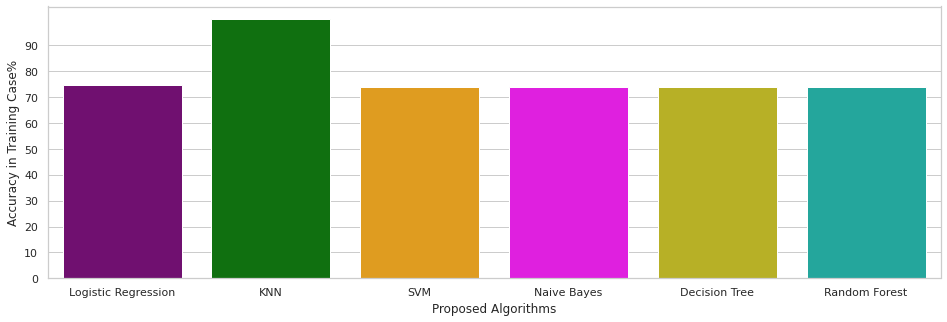

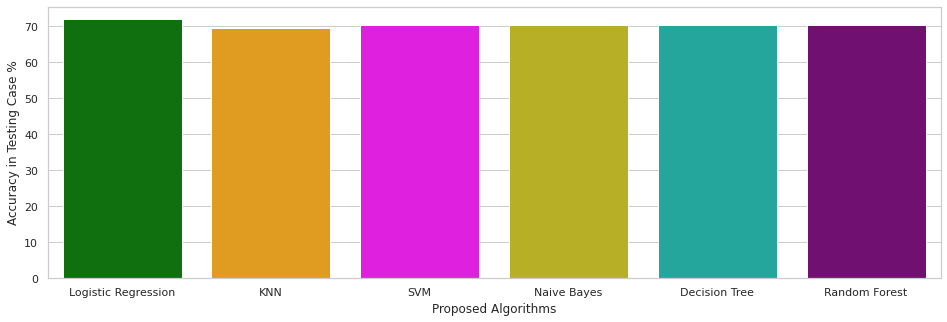

In [276]:
colors1 = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in Training Case%")
plt.xlabel("Proposed Algorithms")
sns.barplot(x=list(accuracies1.keys()), y=list(accuracies1.values()), palette=colors1)

colors2 = ["green", "orange", "magenta","#CFC60E","#0FBBAE","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in Testing Case %")
plt.xlabel("Proposed Algorithms")
sns.barplot(x=list(accuracies2.keys()), y=list(accuracies2.values()), palette=colors2)


Our models work fine but best of them are KNN and Random Forest with 88.52% of accuracy. Let's look their confusion matrixes.

## Confusion Matrix

In [277]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [278]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


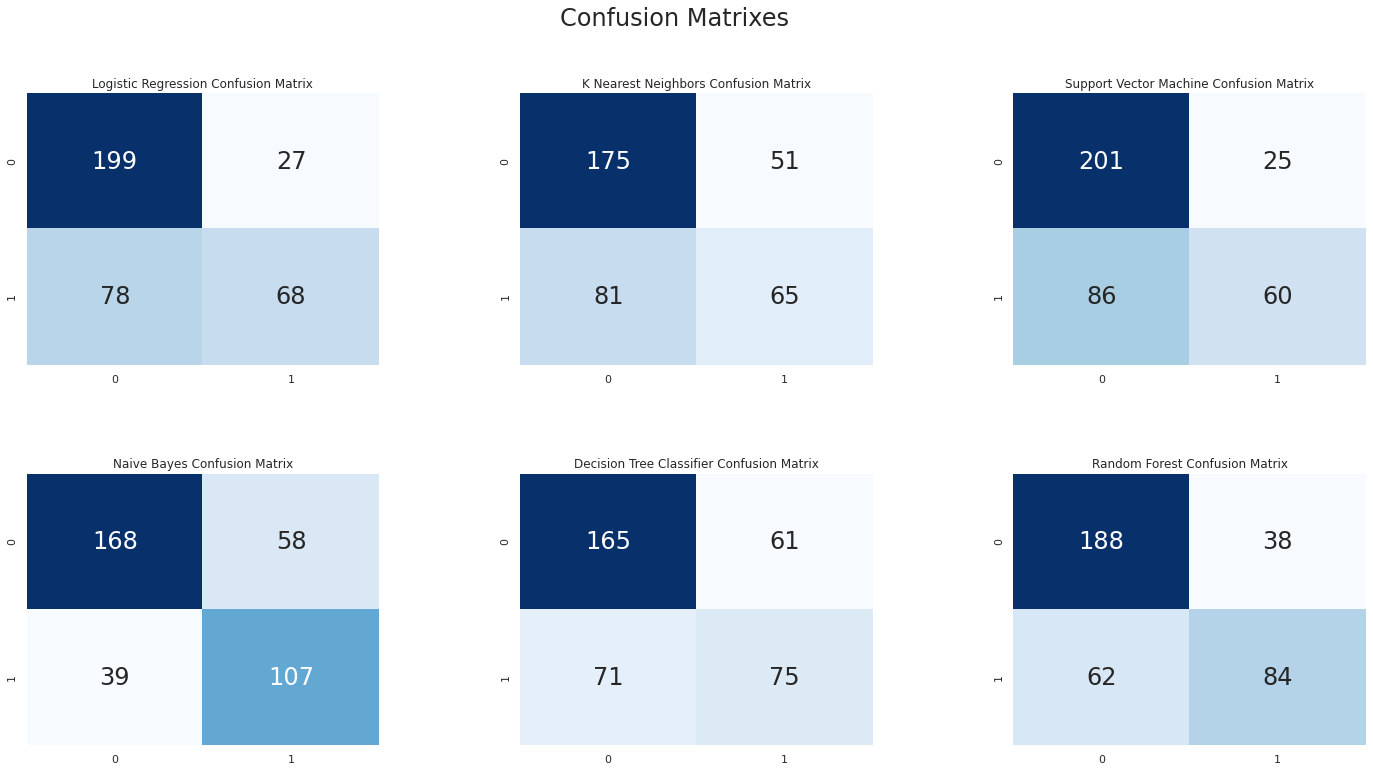

In [279]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

**I am new with data science. Please comment me your feedbacks to help me improve myself. Thanks for your time.**